Amaan Hassanali (with some help from Sarah Teng & Anika Vaishampayan)
PIC 16A
Homework 6
11/22/2020

I affirm that I personally wrote the text, code, and comments in this homework assignment.

# Homework 6

## Problem 0

It is highly recommended that you work with your group to fully complete the Discussion assignments on 11/17, 11/19, and 11/24, as these will directly help with your project. 

## Problem 1

In [Live Lecture 19](https://nbviewer.jupyter.org/github/PhilChodrow/PIC16A/blob/master/live_lectures/live-lecture-19.ipynb), we created a complex visualization of global GDP and life-expectancy using the `gapminder` data set. Video for this lecture is also available on CCLE. 

In this problem, you will create an alternative visualization using line plots and the `apply` method of `pandas` data frames. 

### Part A

Run the code below to retrieve the data and take a look. 

In [1]:
import urllib
import pandas as pd
def retrieve_data(url):
    """
    Retrieve a file from the specified url and save it in a local file 
    called data.csv. 
    """
    
    # grab the data and parse it
    filedata = urllib.request.urlopen(url) 
    to_write = filedata.read()
    
    # write to file
    with open("data.csv", "wb") as f:
        f.write(to_write)
        
retrieve_data("https://philchodrow.github.io/PIC16A/datasets/gapminder.csv")
gapminder = pd.read_csv("data.csv")
gapminder

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


Use the `gapminder` data to create the following visualization: 

<figure class="image" style="width:100%">
  <img src="https://philchodrow.github.io/PIC16A/homework/gapminder_p1.png
" alt="A five-panel plot in which each panel corresponds to a continent. For each country, there is a trend-line in life expectancy in the panel corresponding to the continent on which the country is located. The trendlines are slightly transparent, and differently colored within each continent. The years on the axis are labeld from 1952 through 2007. The vertical axis is labeled 'Life Expectancy (Years).'" width="800px">
</figure>

You should achieve this result **without for-loops** and also without manually creating the plot on each axis. You may find it useful to define additional data structures such as dictionaries, that assign colors or axis indices to continents. Feel free to modify aesthetic details of the plots, such as the colors. 

Hint: `df.groupby().apply()`. You will need to define an appropriate function place inside the `apply` call. 

Working without for-loops is a nightmare. I spent hours and hours thinking of and researching ways to index the apply method on groupby functions but to no avail. Alas, I decided to ask someone for help and they explained that using .max() can be used to take the index of the largest column. After changing some values here and there, I finally figured out how to implement it, and it worked. The remainder of the problem was fairly straightforward and easily followed from what we learnt in lecture. Again, just to reiterate, for-loops are #BestLoop.

""


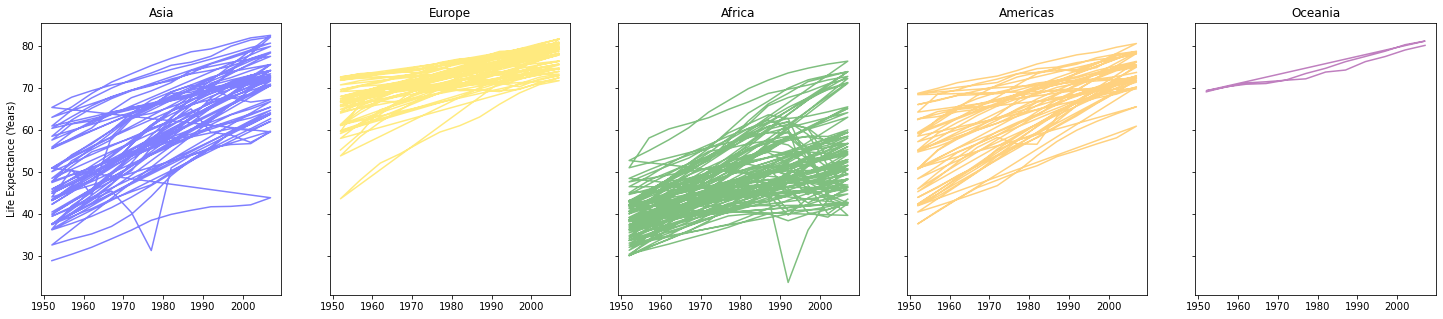

In [2]:
# your solution
import numpy as np
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 5, figsize = (25, 5), sharex = True, sharey = True) #Creating the figure with 5 axes

#Dictionary of index
D = {
    "Asia"     : 0, 
    "Europe"   : 1,
    "Africa"   : 2,
    "Americas" : 3,
    "Oceania"  : 4
}

#Dictionary of colors
C = {
    "Asia"     :   "Blue", 
    "Europe"   :   "Gold",
    "Africa"   :  "Green",
    "Americas" : "Orange",
    "Oceania"  : "Purple"
}

def plot_line(df):
    """
    Takes a dataframe as an input.
    Stores the continent element from the continent column to which it currently is being applied.
    Plots an axis with an index correponding to the dictionary above.
    Sets the color corresponding to the second dictionary above.
    Sets additional features including the y-label and title.
    """
    continent = df["continent"].max() #Stores the continent to which the function is currently being applied.
    ax[D[continent]].plot(df["year"], df["lifeExp"], color = C[continent], alpha = 0.5) #Creating the plot
    ax[D[continent]].set(ylabel = "Life Expectance (Years)") #Setting the ylabel
    ax[D[continent]].label_outer() #Setting the y-label to the outer edge
    ax[D[continent]].set_title(continent) #Giving corresponding titles to each axis
    
gapminder.groupby("continent").apply(plot_line) #Applying the function to gapminder with groupby

## Problem 2

In our first lecture on machine learning, we did linear regression "by hand." In this problem, we will similarly perform logistic regression "by hand." This homework problem is closely parallel to the lecture, and so you might want to have the [notes](https://nbviewer.jupyter.org/github/PhilChodrow/PIC16A/blob/master/content/ML/ML_2.ipynb) handy.  

Whereas linear regression is often used to measure arbitrary quantities like GDP or happiness scores, logistic regression is primarily used to estimate *probabilities*. For example, we might use logistic regression to estimate the probability of a passenger surviving the Titanic crash, a borrower defaulting on a loan, or an email being spam.

For concreteness, let's say that we are considering the latter case. Suppose that we wish to model the probability that an email is spam as a function of the proportion of flag words (like "investment", "capital", "bank", "account", etc.) in the email's body text. Call this proportion $x$. $x$ is then a variable between $0$ and $1$. 

In logistic regression, we suppose that the probability $p$ that an email is spam has the form 

$$p = \frac{1}{1+e^{-ax - b}}\;,$$

where $a$ and $b$ are again parameters. Let's see how this looks. 

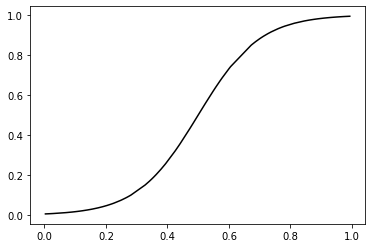

In [3]:
# run this block

import numpy as np
from matplotlib import pyplot as plt

n_points = 100

a = 10
b = -5

x = np.sort(np.random.rand(n_points))
p = 1/(1+np.exp(-a*x - b))

fig, ax = plt.subplots(1)
ax.plot(x, p, color = "black")

As usual, in practice we don't have access to the true function telling us the probability that an email is spam. Instead, we have access to data telling us whether or not the email really IS spam. We can model this situation by flipping a biased coin for each email, with the probability of heads determined by the modeled probability. 

In [4]:
# run this block
y = 1.0*(np.random.rand(n_points) < p)

A value of 1 indicates that the email is indeed spam, while a value of 0 indicates that the email is not spam. 

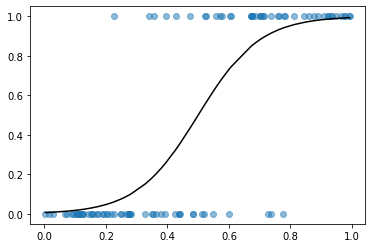

In [5]:
# run this block
ax.scatter(x, y,  alpha = 0.5)
fig

Notice that there are more spam emails where the model gives a high probability, and fewer where the model gives a lower probability. However, there may be some non-spam emails with even high probability -- sometimes we get legitimate emails about bank accounts, investments, etc.  

Of course, we don't have access to the true model, so our practical situation looks more like this: 

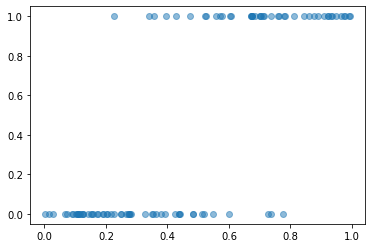

In [6]:
# run this block
fig, ax = plt.subplots(1)
ax.scatter(x, y, alpha = 0.5)

We would like to use logistic regression to try to recover something close to the true model. 

## Part A

Write the model function `f`. The arguments of `f` should be the predictor variables `x` and the parameters `a` and `b`. The output of `f` should be the spam probabilities under the logistic model (see equation above) for these data. Use `numpy` tools, without `for`-loops. If you scan the above code carefully, you'll observe that most of this code is already written for you. 

This is a simple function, but **please add a short docstring indicating** what kinds of input it accepts and how to interpret the output. 

Comments are necessary only if your function body exceeds one line. 

This problem was quite simple in that it required merely rewriting the given formula in terms of python-numpy code.

In [7]:
# your solution here
def f(x, a, b):
    """
    Takes in x - an arrays of predictor numbers, a and b - random floats.
    Returns probabilities under the given logistic model.
    """
    return 1/(1 + np.exp(-a*x - b))

## Part B

Plot 10 candidate models against the data, using randomly chosen values of `a` between 5 and 15 and randomly chosen values of `b` between -2.5 and -7.5. Your plot should resemble in certain respects the third plot in [these lecture notes](https://nbviewer.jupyter.org/github/PhilChodrow/PIC16A/blob/master/content/ML/ML_2.ipynb). 

Comments are not necessary in this part. 

Fort his problem, I created the subplots and a for-loop with ease (I missed you #BestLoop). Generating the first random number involved elementary arithmetic operations, however, I wasn't sure if the range of the second random number would work if I utilized similar elementary operations. Thus, I decided to use random.uniform just to be sure. I then plotted the curves, as required.

NameError: name 'random' is not defined

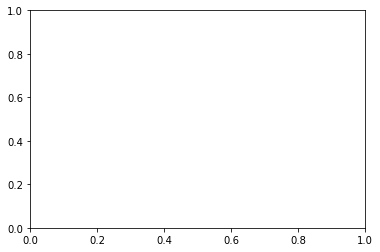

In [8]:
# your solution here
fig, ax = plt.subplots(1) #Creating a single axis
for i in range(10):
    a = 10*np.random.rand() + 5 #a is a random number between 5 and 15
    b = random.uniform(-7.5, -2.5) #b is a random number between -2.5 and -7.5
    
    ax.plot(x, f(x, a, b), color = "black", linewidth = 0.5) #Plotting each curve with x and the function defined before.

## Part C

The *loss function* most commonly used in logistic regression is the *negative cross-entropy*. The negative cross-entropy of the `i`th observation is 

$$-\left[y_i \log \hat{p}_i + (1-y_i)\log(1-\hat{p}_i)\right]$$

where $y_i \in \{0,1\}$ is the `i`th entry of the target data and $\hat{p}_i$ is the model's estimated probability that $y_i = 1$. The negative cross-entropy of the entire data set is the sum of the negative cross-entropies for each individual observation. 

Write a function that computes the negative cross entropy as a function of `x`, `y`, `a`, and `b`. This can be done in no more than two lines using `numpy`, without `for`-loops. Don't forget which logarithm is \#BestLogarithm.  

As in Part B, please write a short docstring describing what your function does and what inputs it accepts. Comments are necessary only if your function body exceeds two lines. 

Creating the loss function involved rewriting the formula above and substituting in the predictions function written previously. I used log_10 instead of ln because the formula given above does so, and because the formula, as checked online uses it too. Not to mention, the problem merely says "Don't forget", and not "Use". 

In [ ]:
# your solution here
def neg(x, y, a, b):
    """
    Accepts x - array of predictor numbers , y - array of 0s and 1s, a and b - random floats.
    Returns the negative cross-entropy loss function.
    """
    preds = f(x, a, b) #Predictions variable
    return (-(y*np.log10(preds) + (1-y)*np.log10((1-preds)))).mean() #Returning appropriate output

## Part D

On a single axis, plot 100 distinct models (using the code that you wrote in) in Part B. Highlight the one with the lowest negative cross entropy in a different color -- say, red. Compare the best values of `a` and `b` that you found to the true values, which were `a = 10` and `b = -5`. Are you close? 

The plot you produce should resemble, in some respects, the fifth plot in [these lecture notes](https://nbviewer.jupyter.org/github/PhilChodrow/PIC16A/blob/master/content/ML/ML_2.ipynb). 

It is not necessary to write comments in this part. 

This problem followed directly from the lecture, with a few minor changes here and there. The resultant plot was as expected.

In [ ]:
# your solution here
fig, ax = plt.subplots(1) #Creating a single subplot
ax.scatter(x, y)

besta = 0 #best a
bestb = 0 #best b
besterr = np.inf #best error

#Looping over a range of 100 to create 100 distinct models
for i in range(100):
    a = 5 + np.random.rand()*10
    #b = -7.5 + (np.random.rand()*10)
    b = random.uniform(-7.5, -2.5)
    
    error = neg(x, y, a, b) #The error is the loss function value with a, b and x, y as above
    
    #If error is less than infinity (true in first case)
    if error < besterr:
        besterr = error #The best error becomes the current erro
        besta = a #The best a is a
        bestb = b #The best b is b
    preds = f(x, a, b) #Predictions variable
    ax.plot(x, preds, color = "black", alpha = 0.2) #Plotting curve(s)
    
bestpreds = f(x, besta, bestb) #The curve with the best prediction
ax.plot(x, bestpreds, color = "red") #Plotting the curve with the best prediction

In [ ]:
# show your optimal parameters here
# true parameters were a = 10, b = -5
besta, bestb

It is not required to use `scipy.optimize` to more accurately estimate `a` and `b` for this homework assignment, but you are  free to do so if you wish. You may then use the optimal estimates in the following part. 

## Part E

In classification tasks, we evaluate not just the standard loss function, but also the *accuracy* -- how often does the model correctly classify the data? Let's say that the model classifies an email as spam according to the following rule: 

1. If $\hat{p}_i$ (the model probability plotted above) is larger than $c$, classify the email as spam. 
2. If $\hat{p}_i$ is less than or equal to $c$, classify the email as not-spam. 

Write a function called `positive_rates` which accepts the following arguments: 

1. The data, `x` and `y`. 
2. The best parameters `best_a` and `best_b`. 
3. A threshold `c` between 0 and 1. 

This function should output two numbers. The first of these is *false positive rate*: the proportion of non-spam emails that the model incorrectly labels as spam. The second is the *true positive rate*: the proportion of spam emails that the model correctly labels as spam. 

For example: 

```python 
positive_rates(x, y, best_a, best_b, c = 0.5)
```
```
(0.1454545454545455, 0.8545454545454545)
```

**Note**: due to randomization, your numerical output may be slightly different. 

Please write a descriptive docstring for your function. Comments are necessary only if your function body exceeds five lines. 

This function required a little extra thinking to figure out. The output was axiomatically a ratio, however, the denominator of the ratio was somewhat obscure, mostly because the sum in the given example happened to add up to 1, which in turn led my group members and I to fix the function to add up to 1. We quickly realized we were wrong when we got negative values and eventually plotted a linear, decreasing curve in the next problem. After a meticulous review of the question specifications, we realized the necessary denominator and modified the function accordingly. The results were quite satisfactory.

In [ ]:
# your solution here
def positive_rates(x, y, best_a, best_b, c):
    """
    Takes in five parameters: x, y, best a , best b and a float c (where c is between 0 and 1).
    Finds all emails in the prediction data set and given then true-false vales based on whether they are spam.
    Created counters that determine the appropriate numbers to calculate proportions.
    The counters include incorrect labels of non-spam, correct labels of spam, total non-spam, and total spam.
    Returns the false positive rate (ratio of incorrect labels to total non-spam emails)
    Also returns the true positive rate (ratio of correct labels to total spam emails)
    """
    #Prediction as a true-false array (true if spam, false if not spam)
    spam = f(x, best_a, best_b) > c
    #Counters
    incorrect = 0
    correct = 0
    noofspam = 0
    noofnonspam = 0
    
    for i in range(len(y)):
        if y[i] == 1: #Out of all the spam identified
            noofspam += 1 #Add up spam emails
            if spam[i] == y[i]: #If spam was correctly identified
                correct += 1 #Add to correct counter
        else:
            noofnonspam += 1 #Add up nonspam emails
            if spam[i] != y[i]: #If spam was incorrectly identified
                incorrect += 1 #Add to incorrect counter
            
    return (incorrect/noofnonspam, correct/noofspam) #Returning proportions

In [ ]:
# demonstrate your function here
positive_rates(x, y, besta, bestb, c = 0.5)

## Part F

Plot the *receiver operating characteristic* (ROC) curve for the logistic model with parameters `best_a` and `best_b`. The ROC curve is the plot of the `false_positive` rate (on the horizontal axis) against the `true_positive` rate (on the vertical axis) as the threshold `c` is allowed to vary. Additionally, plot a diagonal line ("the line of equality") between the points (0,0) and (1,1). Your ROC curve should lie noticeably above the line of equality. 

Here's a cartoon image of what an ROC curve should look like and roughly how one might evaluate such a curve. 
<figure class="image" style="width:100%">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/36/Roc-draft-xkcd-style.svg/1280px-Roc-draft-xkcd-style.svg.png" alt="A single plot on which several lines are drawn. The horizontal and vertical axes both run from 0 to 1. The horizontal axis is labeled 'False Positive Rate' while the vertical axis is labeled 'True Positive Rate.' The line of equality, which runs from bottom left to top right, is shown. There are several curves that also run from the bottom left to top right, but which veer toward the top left corner. Curves that run closer to the top left corner indicate better predictors." width="400px"> <br>
    <caption><i>Image credit: Martin Thoma, via Wikipedia.</i></caption>
</figure>

Plot your curves in different colors and add a legend to help your reader understand the plot. 

It is ok to use `for`-loops and list comprehensions in this part. 

I decided to bring back good ol' lists, which take in the different values of the threshold c, based on the index of the for-loop. Then, I converted these lists to arrays, plotted them and formatted them per the specifications. Although the curve was wrong at first, this was due to the function in the previous part, and after modifying the funciton, the resulting ROC curve looks great, as seen below.

In [ ]:
# your solution here
fig, ax = plt.subplots(1)

#Empty lists
xlist = []
ylist = []
#Looping 100 times
for i in range(100):
    xlist.append(positive_rates(x, y, besta, bestb, 0.01*i)[0]) #Appending false positive rate to x with c as 0.01*i
    ylist.append(positive_rates(x, y, besta, bestb, 0.01*i)[1])#Appending true positive rate to y with c as 0.01*i

xarr = np.array(xlist) #Array of false positive rates
yarr = np.array(ylist)#Array of true positive rates

ax.plot(xarr, yarr, label = "ROC Curve") #Creating a plot with arrays of false positive and true positive rates
ax.set(xlabel = "False Positive Rate", ylabel = "True Positive Rate") #Setting labels
ax.set_title("ROC CURVE") #Setting a title

xlin = np.linspace(0, 1, 10) #Creating 10 evenly space points between 0 and 1
ax.plot(xlin, xlin, color = "firebrick", label = "Line of Equality") #Plotting straight line with gradient 1
plt.legend() #Adding a legend

Generally speaking, a "good" classifier is one that can reach the closets to the top-left corner of the ROC diagram. This is a classifier that can achieve a high rate of true positives, while keeping a low rate of false positives. There are various ways to measure how "good" an ROC curve is, which are beyond our present scope. 